Exploración de los datos

In [ ]:
#importar librerias
import pandas as pd
import numpy as np
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline








In [ ]:
# Lectura de los datos
#df_auto = pd.read_csv('data/auto-mpg.csv')
dfemployee_survey_data= pd.read_csv("https://raw.githubusercontent.com/ivandiaz25/Proyecto_Analitica_1/master/Datasets/employee_survey_data.csv", na_values='?')
dfgeneral_data = pd.read_csv("https://raw.githubusercontent.com/ivandiaz25/Proyecto_Analitica_1/master/Datasets/general_data.csv", na_values='?')
dfmanager_survey_data = pd.read_csv("https://raw.githubusercontent.com/ivandiaz25/Proyecto_Analitica_1/master/Datasets/manager_survey_data.csv", na_values='?')
dftime_work = pd.read_csv("https://raw.githubusercontent.com/ivandiaz25/Proyecto_Analitica_1/master/Datasets/time_work.csv", na_values='?', sep = ';')

In [ ]:
#Un primer vistazo a que se hayan cargado las tablas correctamente
dfgeneral_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
dfemployee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [ ]:
dfmanager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [ ]:
dftime_work.head()

,EmployeeID,mean_time
0,1,"6,8702"
1,2,"7,316"
2,3,"6,8161"
3,4,"6,7892"
4,5,"7,8776"


In [ ]:
#instalamos complemento
!pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
#Procedemos a unir las tablas para que sean mas facil de trabajar
dftotal=dfgeneral_data.merge(dfemployee_survey_data, on="EmployeeID", how="left")
dftotal.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0


In [ ]:
dftotal2=dftotal.merge(dfmanager_survey_data, on="EmployeeID", how="left")
dftotal2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
dftotal3=dftotal2.merge(dftime_work, on="EmployeeID", how="left")
dftotal3.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3.0,4.0,2.0,3,3,"6,8702"
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,3.0,2.0,4.0,2,4,"7,316"
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,2.0,2.0,1.0,3,3,"6,8161"
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,4.0,4.0,3.0,2,3,"6,7892"
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,4.0,1.0,3.0,3,3,"7,8776"


In [ ]:
# Teniendo finalmente un solo dataframe combinado con todas las tablas usando la columna ID
dfdata=dftotal3.copy()
dfdata.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3.0,4.0,2.0,3,3,"6,8702"
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,3.0,2.0,4.0,2,4,"7,316"
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,2.0,2.0,1.0,3,3,"6,8161"
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,4.0,4.0,3.0,2,3,"6,7892"
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,4.0,1.0,3.0,3,3,"7,8776"


In [ ]:
# Ahora realizaremos una revisión inicial de datos para obsevar como se encuentra nuestro dataframe
dfdata.shape

(4410, 30)

In [ ]:
dfdata.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'mean_time'],
      dtype='object')

In [ ]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
dfdata.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
mean_time                   0
dtype: int64

In [ ]:
for columna in dfdata.columns[:]:
  print('\n {}'.format(columna))
  print(dfdata[columna].unique())


 Age
[51 31 32 38 46 28 29 25 45 36 55 47 37 21 35 26 50 53 42 44 49 18 41 39
 58 33 43 52 27 30 54 40 23 48 57 34 24 22 56 60 19 20 59]

 Attrition
['No' 'Yes']

 BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

 Department
['Sales' 'Research & Development' 'Human Resources']

 DistanceFromHome
[ 6 10 17  2  8 11 18  1  7 28 14  3  4 16  9  5 20 29 15 13 24 19 22 25
 21 26 27 12 23]

 Education
[2 1 4 5 3]

 EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

 EmployeeCount
[1]

 EmployeeID
[   1    2    3 ... 4408 4409 4410]

 Gender
['Female' 'Male']

 JobLevel
[1 4 3 2 5]

 JobRole
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']

 MaritalStatus
['Married' 'Single' 'Divorced']

 MonthlyIncome
[131160  41890 193280 ...  37020  23980  54680]

 NumCompaniesWorked
[ 1.  0.  3.  

In [ ]:
# se graficarán algunas variables para conocer su comportamiento
dfdata.loc[:, ['EmployeeID','MonthlyIncome']].sort_values(by='MonthlyIncome', ascending=False)

,EmployeeID,MonthlyIncome
3325,3326,199990
1855,1856,199990
385,386,199990
941,942,199730
3881,3882,199730
...,...,...
3862,3863,10510
2392,2393,10510
2178,2179,10090
708,709,10090


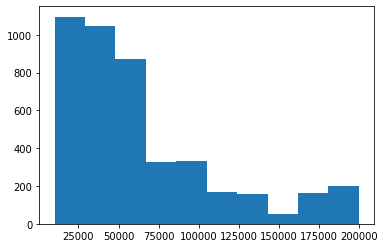

In [ ]:
plt.hist(dfdata['MonthlyIncome'])
plt.show()

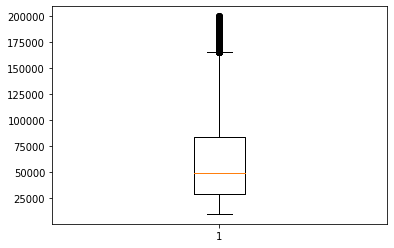

In [ ]:
plt.boxplot(dfdata['MonthlyIncome'])
plt.show()

Text(0.5, 0, 'Nivel de implicacion en el trabajo ')

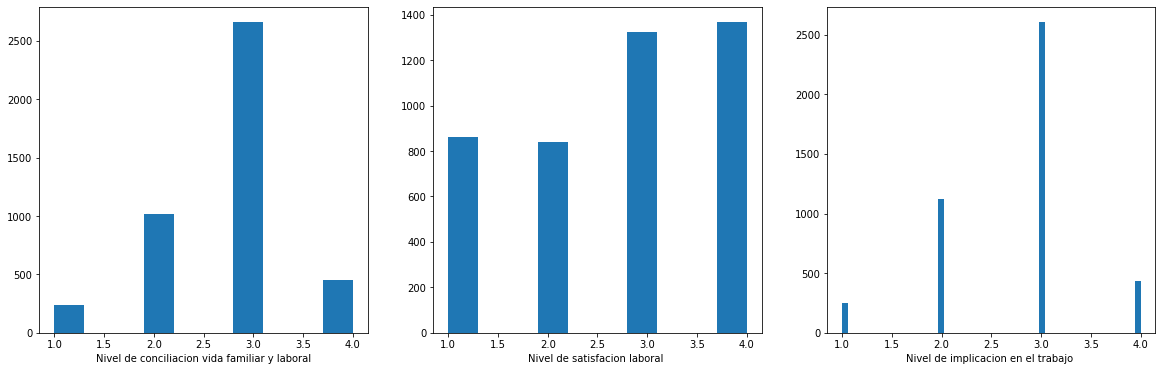

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.hist(dfdata.WorkLifeBalance,10)
plt.xlabel('Nivel de conciliacion vida familiar y laboral')
plt.subplot(1,3,2)
plt.hist(dfdata.JobSatisfaction,10)
plt.xlabel('Nivel de satisfacion laboral ')
plt.subplot(1,3,3)
plt.hist(dfdata.JobInvolvement , 50)
plt.xlabel('Nivel de implicacion en el trabajo ')


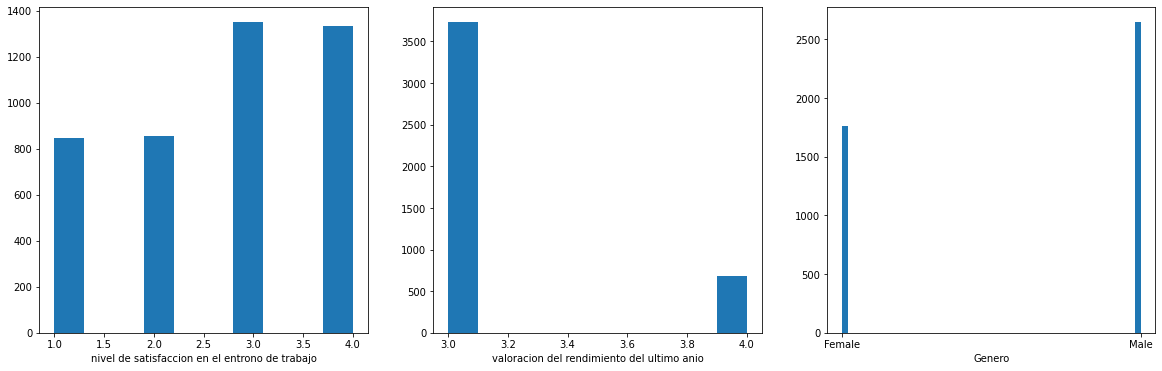

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.hist(dfdata.EnvironmentSatisfaction,10)
plt.xlabel('nivel de satisfaccion en el entrono de trabajo')
plt.subplot(1,3,2)
plt.hist(dfdata.PerformanceRating,10)
plt.xlabel('valoracion del rendimiento del ultimo anio')
plt.subplot(1,3,3)
plt.hist(dfdata.Gender, 50)
plt.xlabel('Genero')

plt.show()

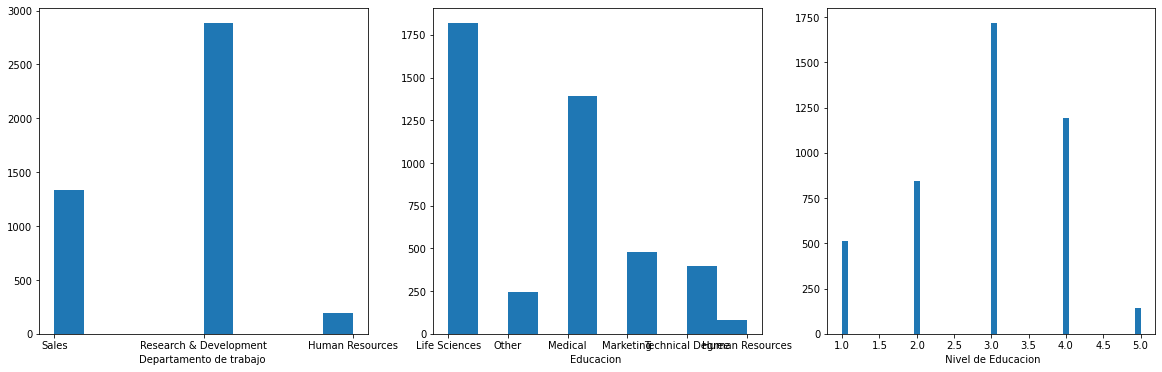

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.hist(dfdata.Department,10)
plt.xlabel('Departamento de trabajo ')
plt.subplot(1,3,2)
plt.hist(dfdata.EducationField,10)
plt.xlabel('Educacion ')
plt.subplot(1,3,3)
plt.hist(dfdata. Education , 50)
plt.xlabel(' Nivel de Educacion')

plt.show()

In [ ]:
# como en esta variables hay nulos, analizaremos el numero de valores de cada uno.
dfdata['NumCompaniesWorked'].value_counts()

NumCompaniesWorked
1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: count, dtype: int64

In [ ]:
dfdata['NumCompaniesWorked'].value_counts()

NumCompaniesWorked
1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: count, dtype: int64

In [ ]:
dfdata['TotalWorkingYears'].value_counts()

TotalWorkingYears
10.0    605
6.0     375
8.0     307
9.0     287
5.0     264
7.0     243
1.0     242
4.0     189
12.0    144
3.0     126
15.0    120
16.0    111
13.0    108
11.0    106
21.0    102
17.0     99
14.0     93
2.0      93
20.0     89
18.0     81
23.0     66
19.0     66
22.0     62
24.0     54
25.0     42
26.0     42
28.0     42
0.0      33
29.0     30
31.0     27
32.0     27
27.0     21
30.0     21
33.0     21
36.0     18
34.0     15
37.0     12
35.0      9
40.0      6
38.0      3
Name: count, dtype: int64

In [ ]:
# para nuestro analisis es mas facil observarlos de mayor a menor, asi que vamos a organizarlos con un pequeño data frame
dfdatay = dfdata.loc[:, ['EmployeeID','TotalWorkingYears']]
dfdatay

,EmployeeID,TotalWorkingYears
0,1,1.0
1,2,6.0
2,3,5.0
3,4,13.0
4,5,9.0
...,...,...
4405,4406,10.0
4406,4407,10.0
4407,4408,5.0
4408,4409,10.0


In [ ]:
ddatay2 = dfdatay.sort_values(by='TotalWorkingYears', ascending=False)
ddatay2

,EmployeeID,TotalWorkingYears
3277,3278,40.0
1807,1808,40.0
4278,4279,40.0
2808,2809,40.0
337,338,40.0
...,...,...
1517,1518,NaN
2367,2368,NaN
3120,3121,NaN
3818,3819,NaN


In [ ]:
#Una vez observado lo que contiene cada variable procederemos primero a tratar los nulos.
# primero analizaremos el porcentaje de nulos que presenta nuetra base de datos
round(dfdata.isnull().sum().sum()/dfdata.size, 4)*100

0.08

In [ ]:
#Como observamos el porcentaje de nulos es mucho menor al 0.1% del total de datos, por lo que no son tan significativos, entonces aprovecharemos
#que se encuentran en varibales con respuestas numericas para aproximarlas al promedio, asi:
median_NumCompaniesWorked=round(dfdata['NumCompaniesWorked'].median())
print(median_NumCompaniesWorked)
dfdata['NumCompaniesWorked']=dfdata['NumCompaniesWorked'].fillna(median_NumCompaniesWorked)
print(dfdata['NumCompaniesWorked'].isnull().sum())
print(dfdata['NumCompaniesWorked'].unique())

2
0
[1. 0. 3. 4. 2. 7. 9. 5. 6. 8.]


In [ ]:
mode_EnvironmentSatisfaction = dfdata['EnvironmentSatisfaction'].mode()
print(mode_EnvironmentSatisfaction)
dfdata['EnvironmentSatisfaction'].fillna(mode_EnvironmentSatisfaction[0], inplace=True)
print(dfdata['EnvironmentSatisfaction'].isnull().sum())
print(dfdata['EnvironmentSatisfaction'].unique())

0    3.0
Name: EnvironmentSatisfaction, dtype: float64
0
[3. 2. 4. 1.]


In [ ]:
median_TotalWorkingYears=round(dfdata['TotalWorkingYears'].median())
print(median_TotalWorkingYears)
dfdata['TotalWorkingYears']=dfdata['TotalWorkingYears'].fillna(median_NumCompaniesWorked)
print(dfdata['TotalWorkingYears'].isnull().sum())
print(dfdata['TotalWorkingYears'].unique())

10
0
[ 1.  6.  5. 13.  9. 28. 10. 21. 16. 37.  7.  3. 15.  8.  2. 12. 17. 19.
 22.  4. 23.  0. 11. 24. 25. 20. 14. 26. 18. 30. 36. 31. 33. 32. 34. 40.
 29. 35. 27. 38.]


In [ ]:
mode_JobSatisfaction = dfdata['JobSatisfaction'].mode()
print(mode_JobSatisfaction)
dfdata['JobSatisfaction'].fillna(mode_JobSatisfaction[0], inplace=True)
print(dfdata['JobSatisfaction'].isnull().sum())
print(dfdata['JobSatisfaction'].unique())

0    4.0
Name: JobSatisfaction, dtype: float64
0
[4. 2. 1. 3.]


In [ ]:
mode_WorkLifeBalance = dfdata['WorkLifeBalance'].mode()
print(mode_WorkLifeBalance)
dfdata['WorkLifeBalance'].fillna(mode_WorkLifeBalance[0], inplace=True)
print(dfdata['WorkLifeBalance'].isnull().sum())
print(dfdata['WorkLifeBalance'].unique())

0    3.0
Name: WorkLifeBalance, dtype: float64
0
[2. 4. 1. 3.]


In [ ]:
dfdata['mean_time'] = dfdata['mean_time'].str.replace(',', '.')

In [ ]:
dfdata['mean_time'] = pd.to_numeric(dfdata['mean_time'], errors='coerce')
print(dfdata['mean_time'])

0       6.8702
1       7.3160
2       6.8161
3       6.7892
4       7.8776
         ...  
4405    8.3169
4406    5.8972
4407    7.1495
4408    9.1876
4409    6.5118
Name: mean_time, Length: 4410, dtype: float64


In [ ]:
mean_mean_time=(dfdata['mean_time'].mean())
print(mean_mean_time)
dfdata['mean_time']=dfdata['mean_time'].fillna(mean_mean_time)
print(dfdata['mean_time'].isnull().sum())
print(dfdata['mean_time'].unique())

7.314362494331067
0
[6.8702 7.316  6.8161 ... 5.8972 9.1876 6.5118]


In [ ]:
# Como podemos observar ahora ya fueron tratados todos los nulos, por lo tanto podemos proceder a realizar el analisis exploratorio para entender mejor
# el comportamiento de nuestras variables
dfdata.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
mean_time                  0
dtype: int64

In [ ]:
df_datafinal = dfdata.loc[:,['Age','DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'mean_time','BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole', 'MaritalStatus', 'Education','JobLevel', 'StockOptionLevel',  'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Attrition']]

In [ ]:
df_datafinal.shape

(4410, 26)

In [ ]:
df_datafinal.describe()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,mean_time,Education,JobLevel,StockOptionLevel,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,65029.312925,2.691837,15.209524,11.260998,2.799320,7.008163,2.187755,4.123129,7.314362,2.912925,2.063946,0.793878,2.725170,2.734014,2.763492,2.729932,3.153741
std,9.133301,8.105026,47068.888559,2.493912,3.659108,7.785550,1.288978,6.125135,3.221699,3.567327,1.330769,1.023933,1.106689,0.851883,1.089852,1.102071,0.703541,0.711400,0.360742
min,18.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.416900,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000,6.279400,2.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,49190.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000,7.011150,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,83800.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000,7.900750,4.000000,3.000000,1.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000,10.937300,5.000000,5.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000


                                             |          | [  0%]   00:00 -> (? left)


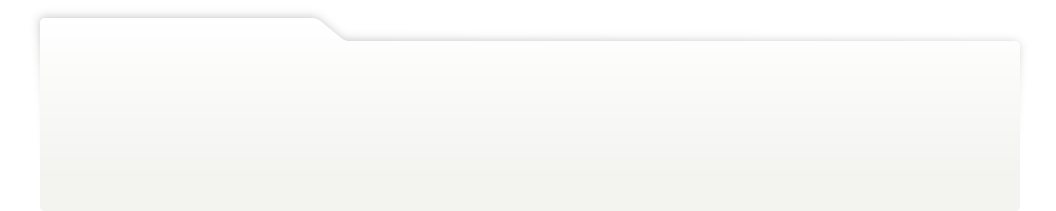
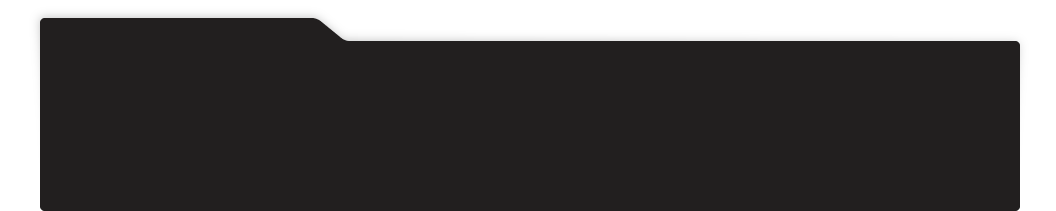
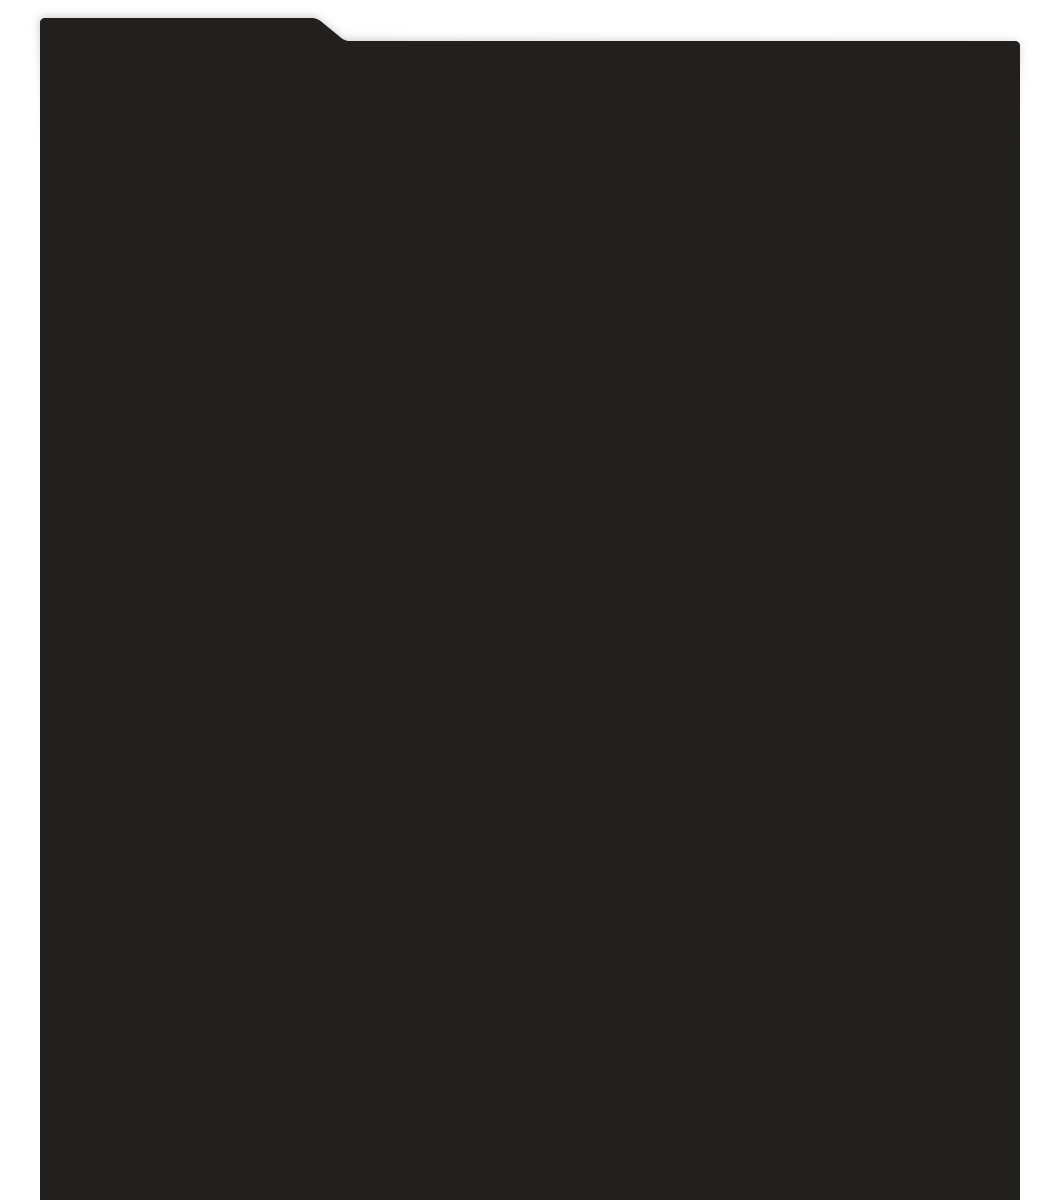
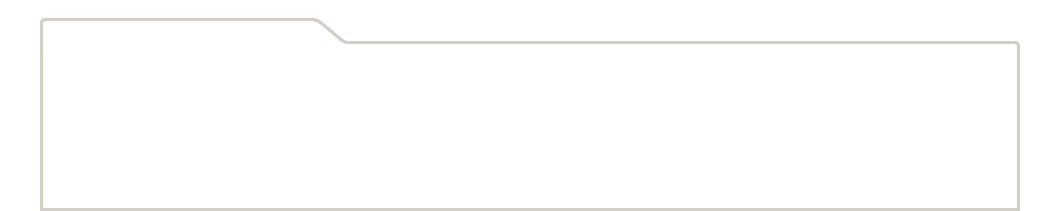
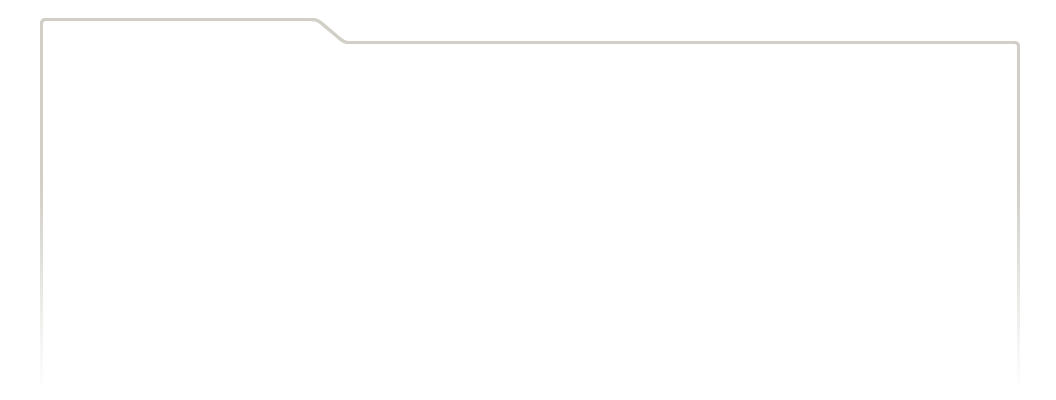
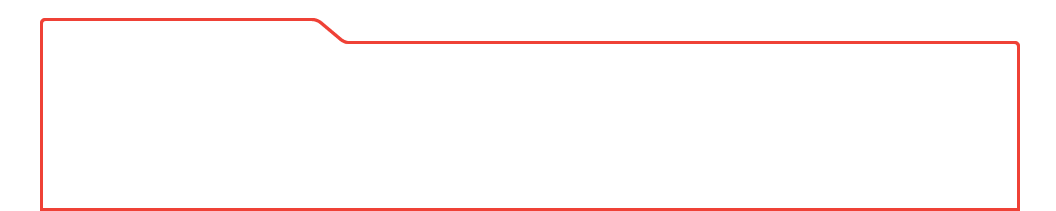
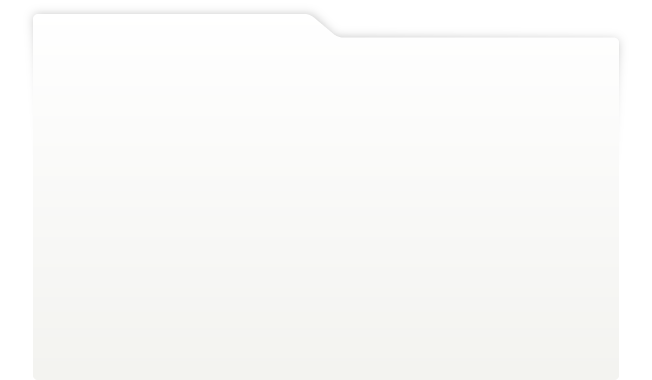
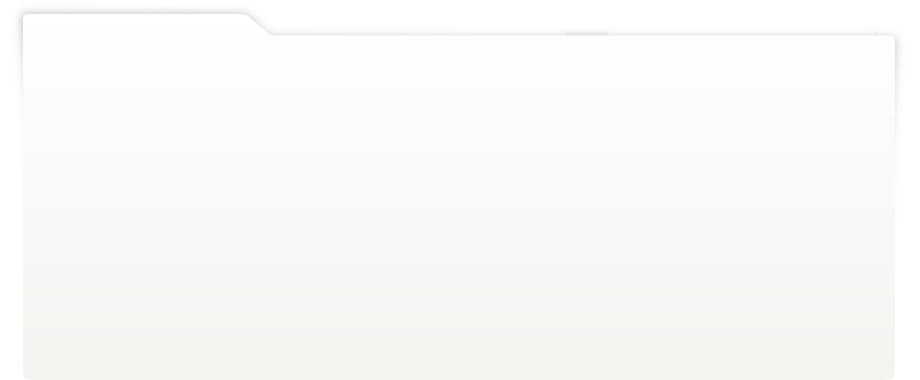
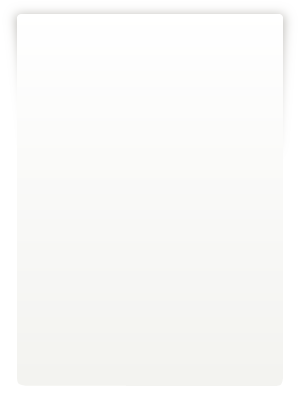
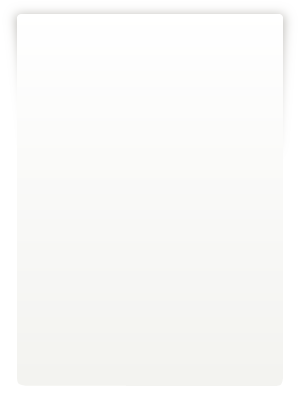
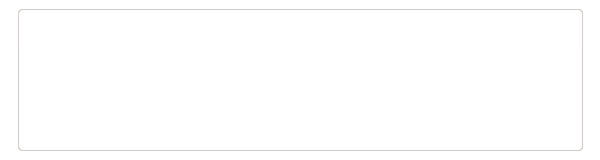
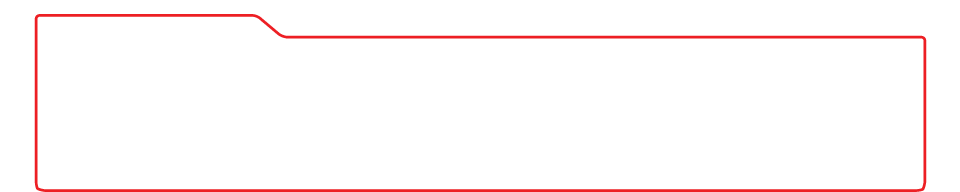
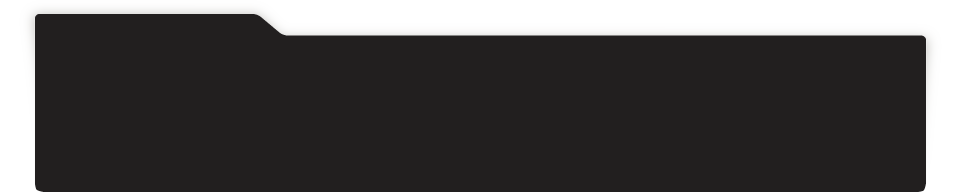
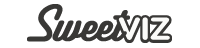
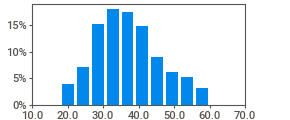
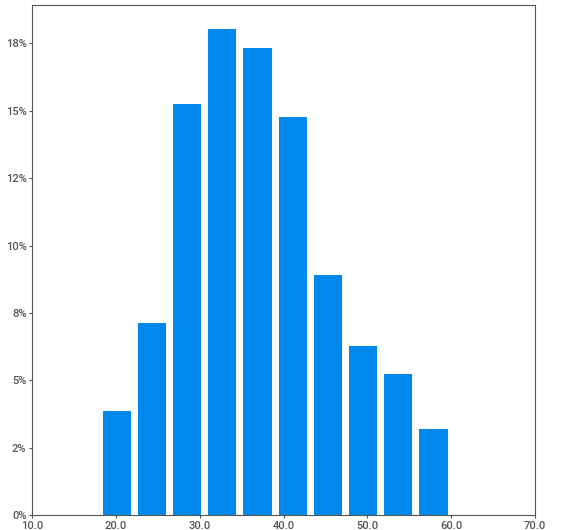
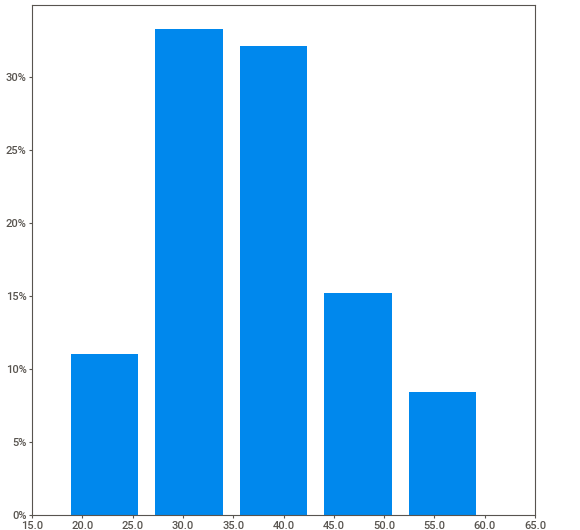
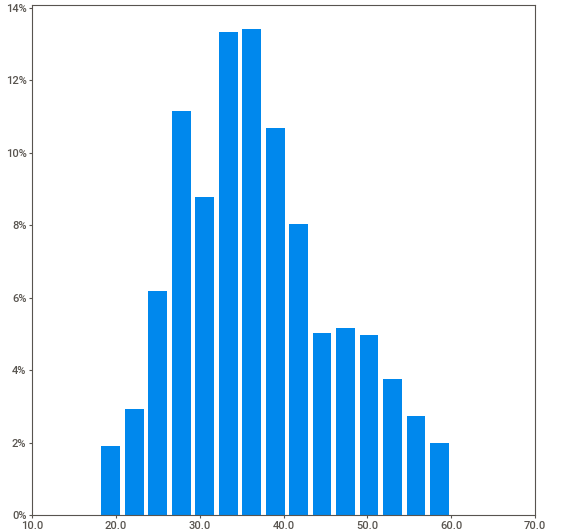
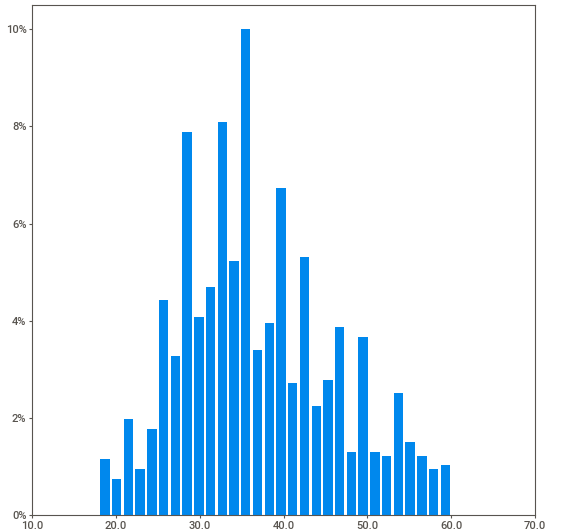
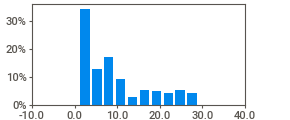
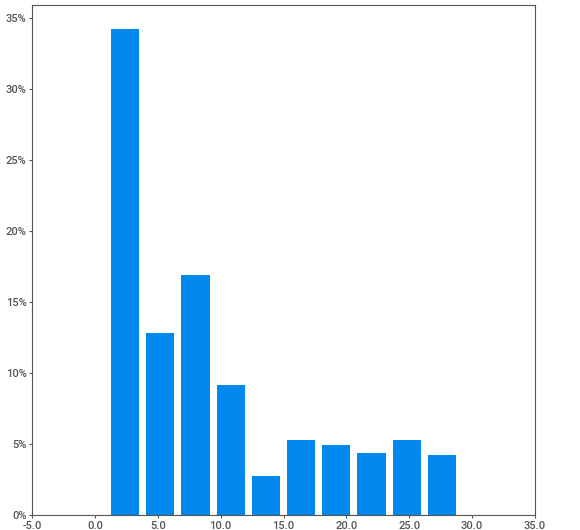
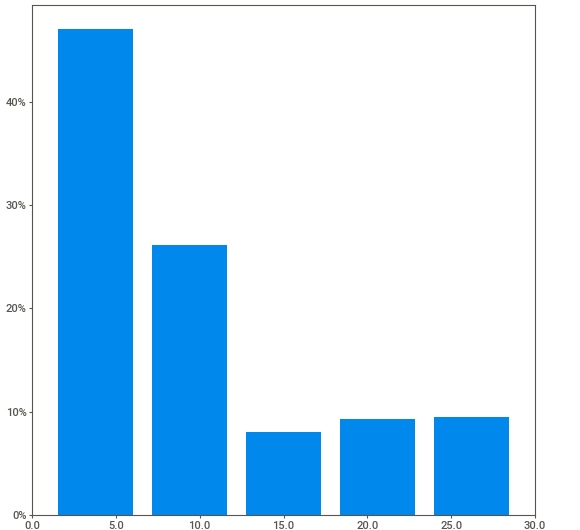
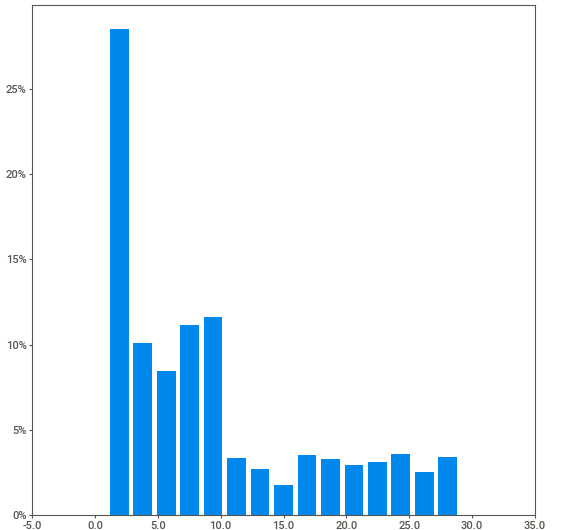
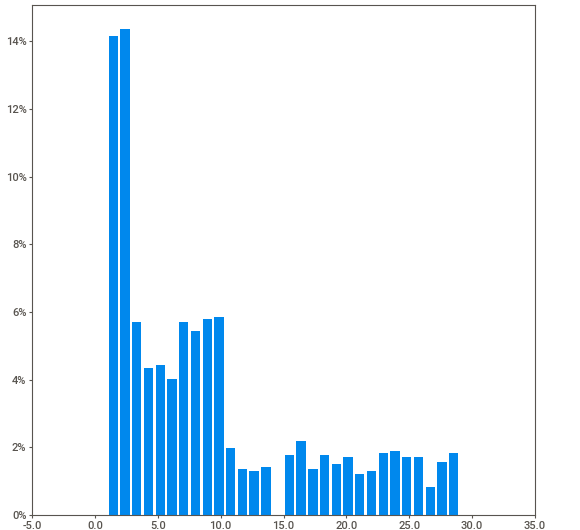
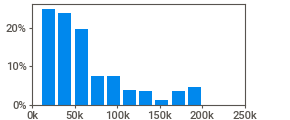
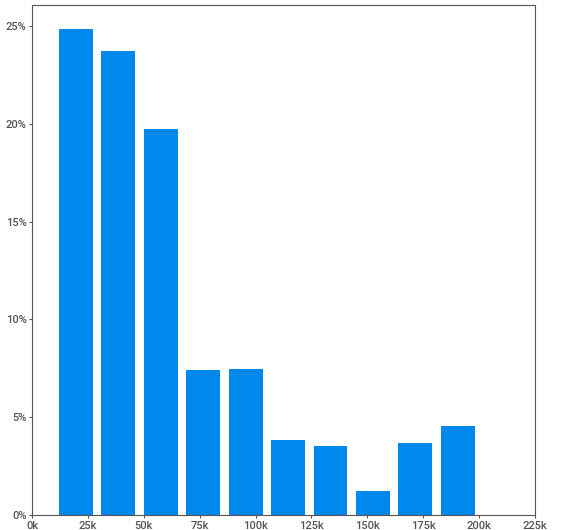
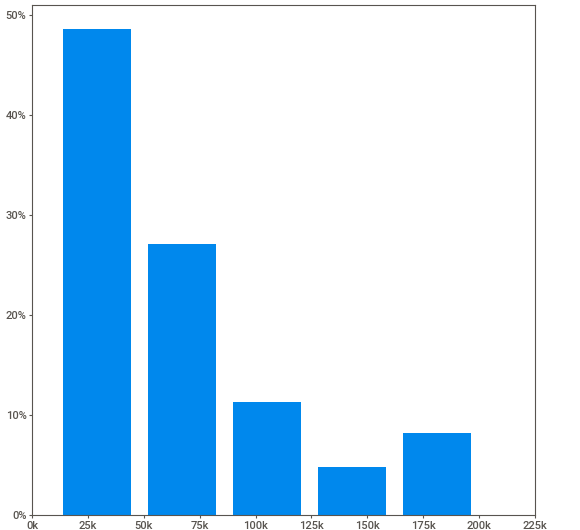
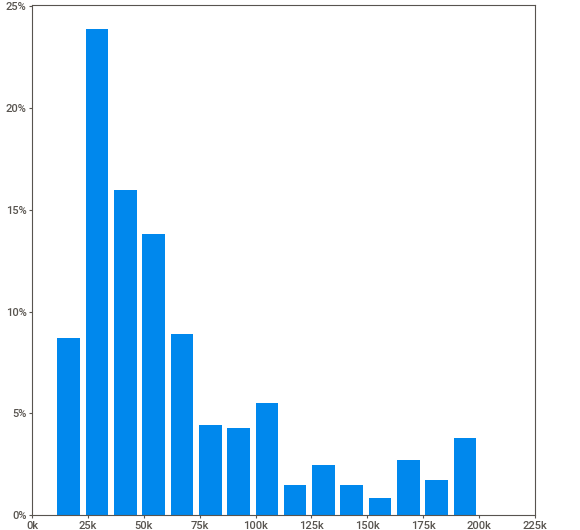
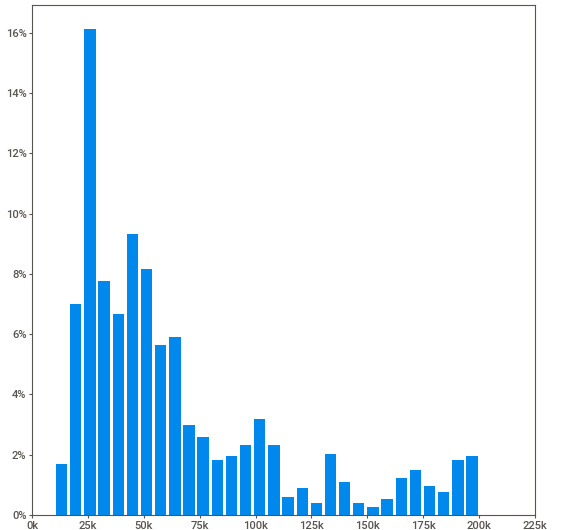
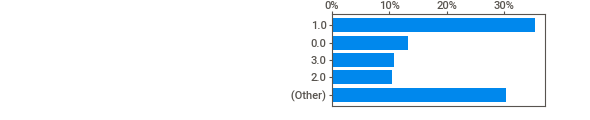
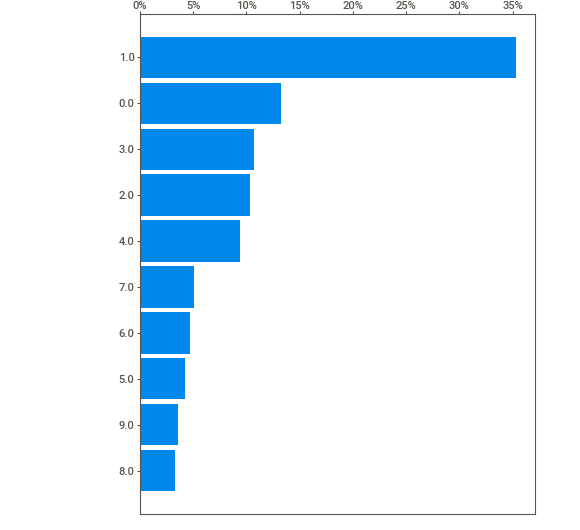
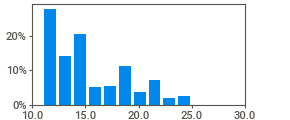
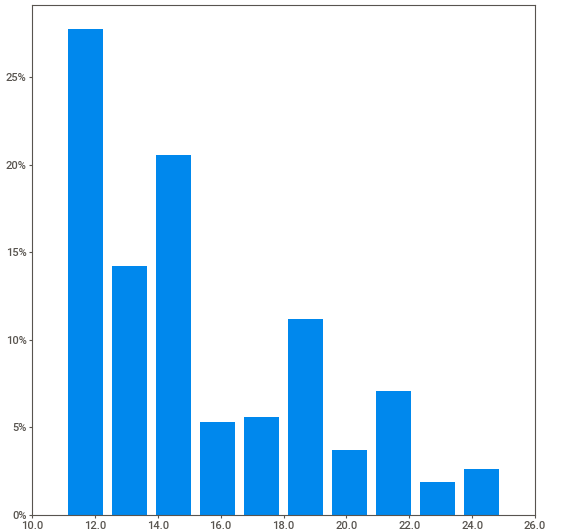
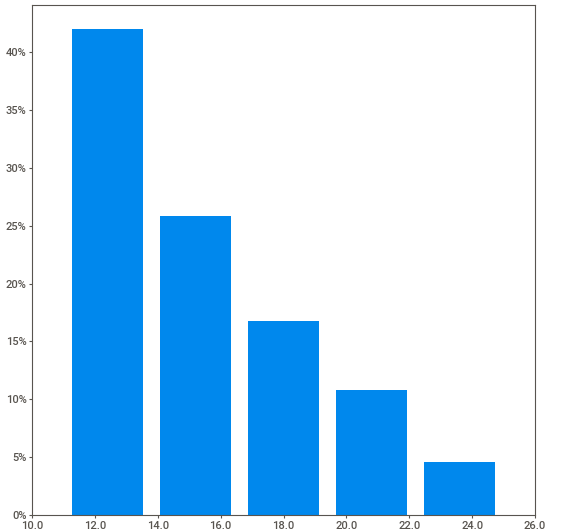
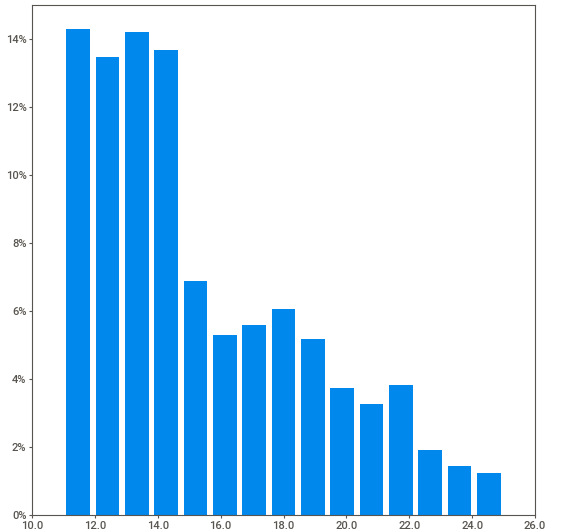
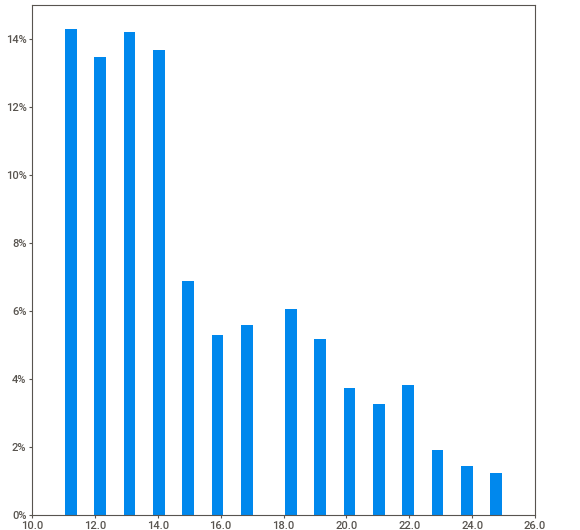
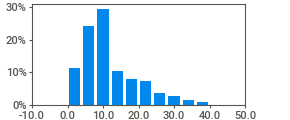
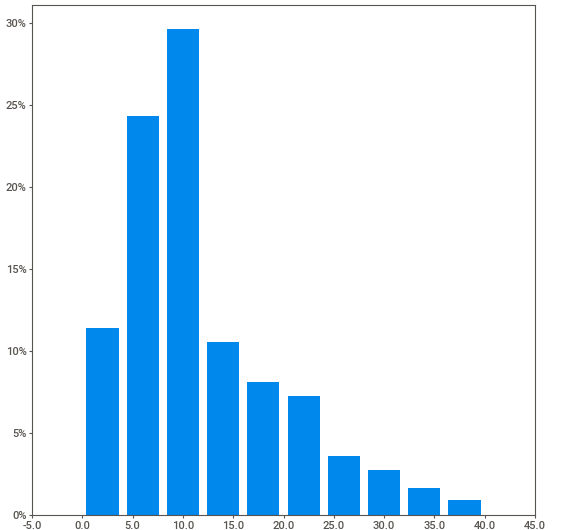
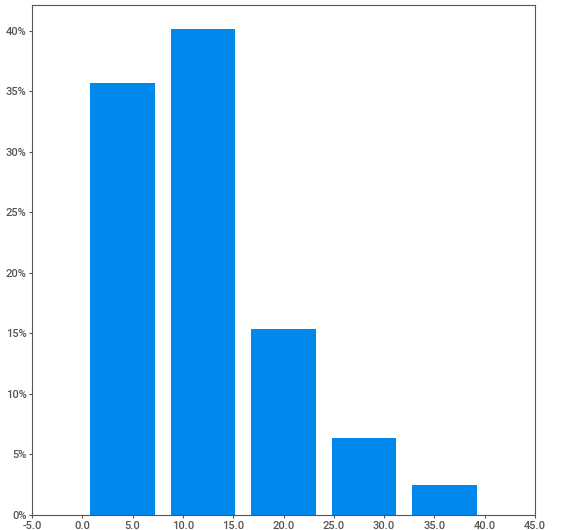
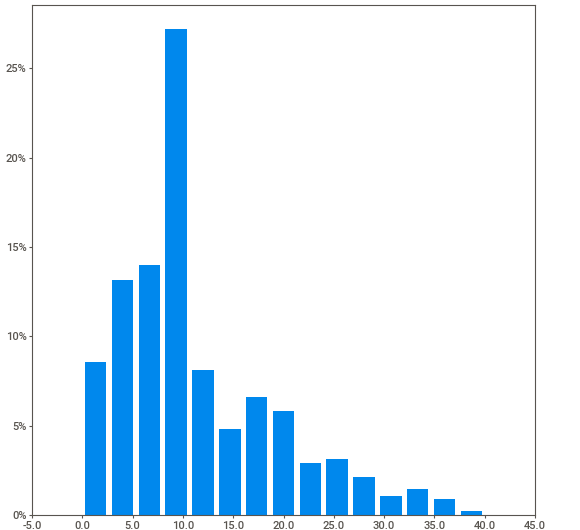
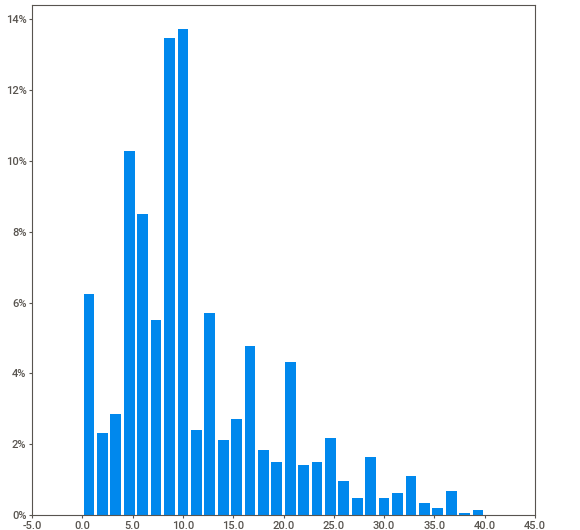
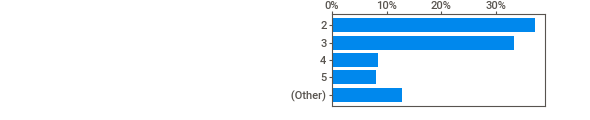
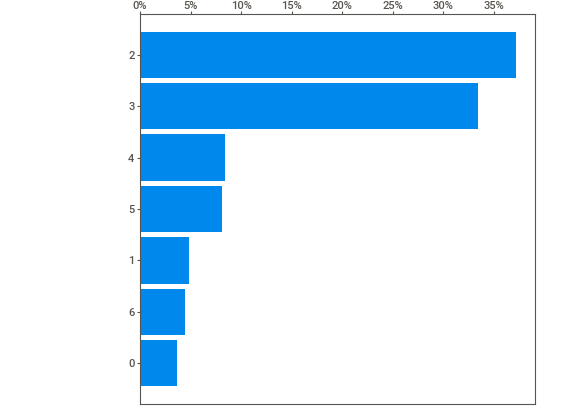
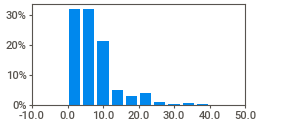
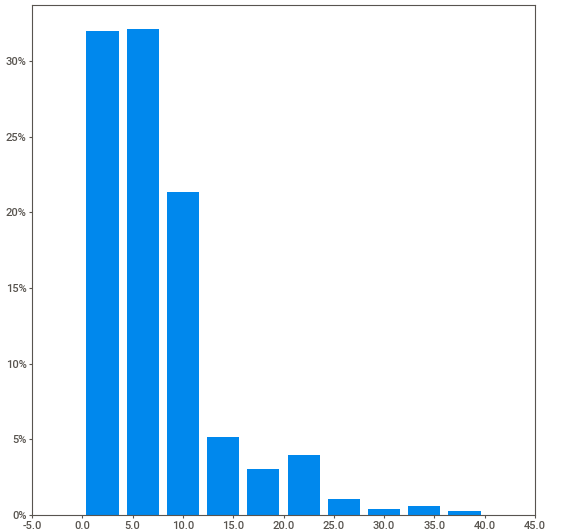
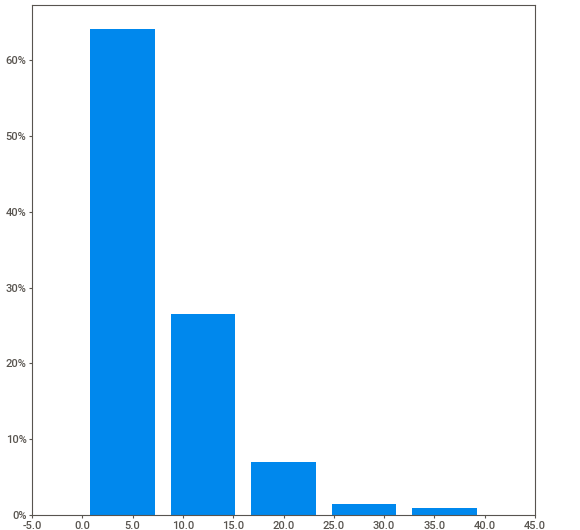
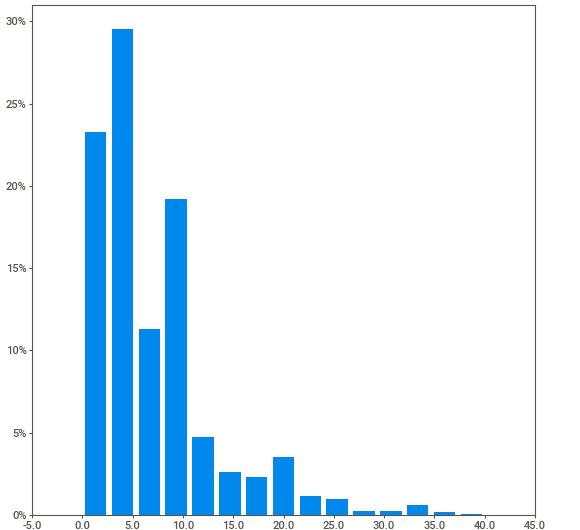
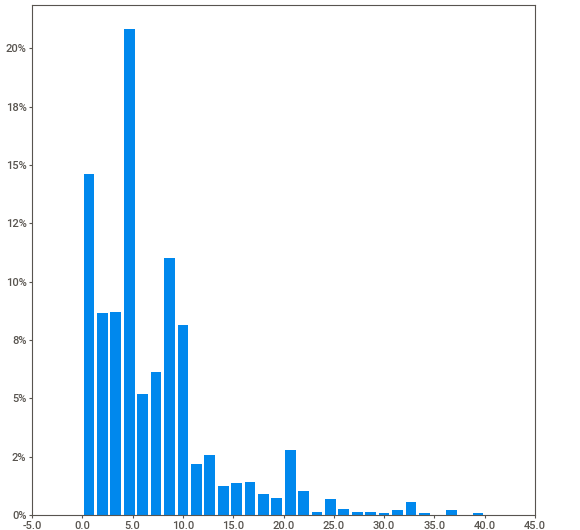
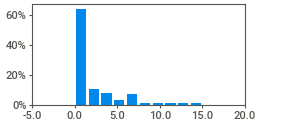
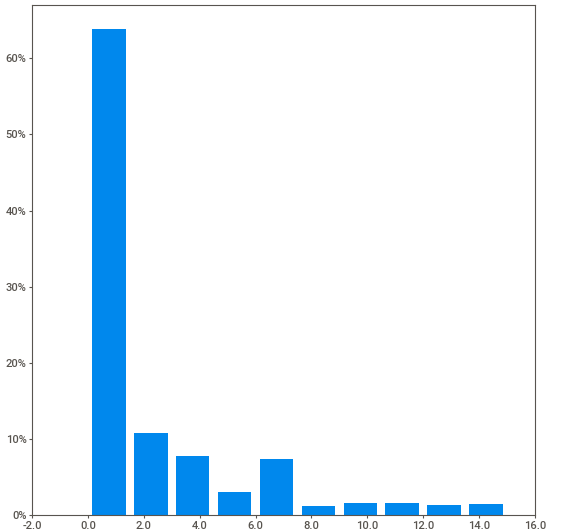
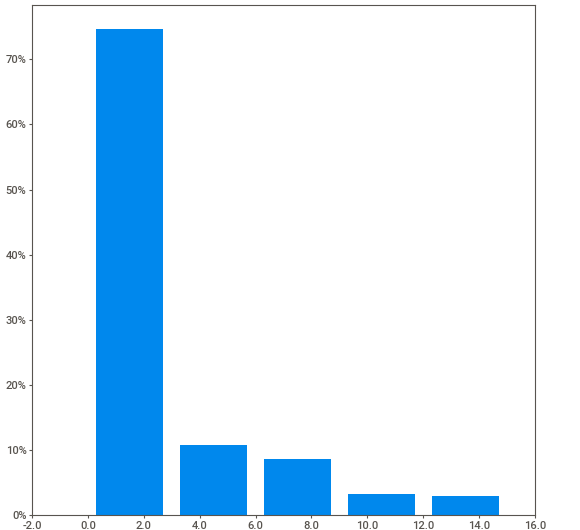
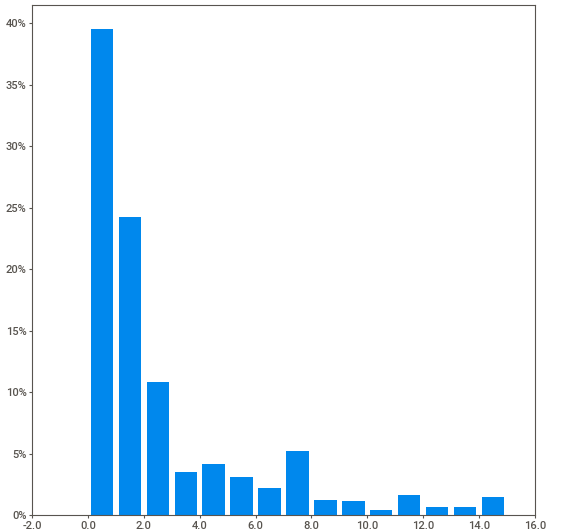
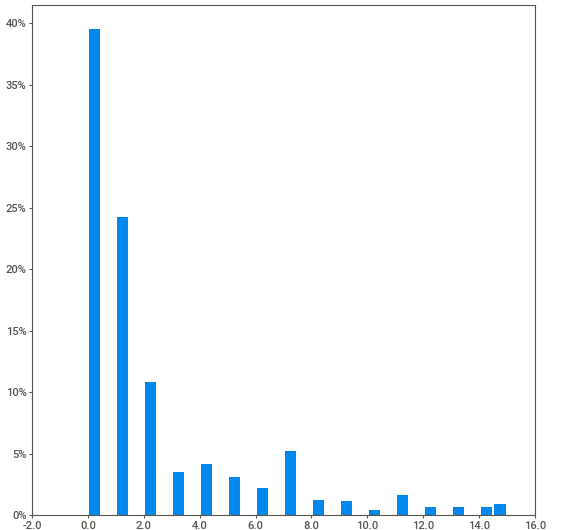
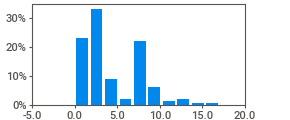
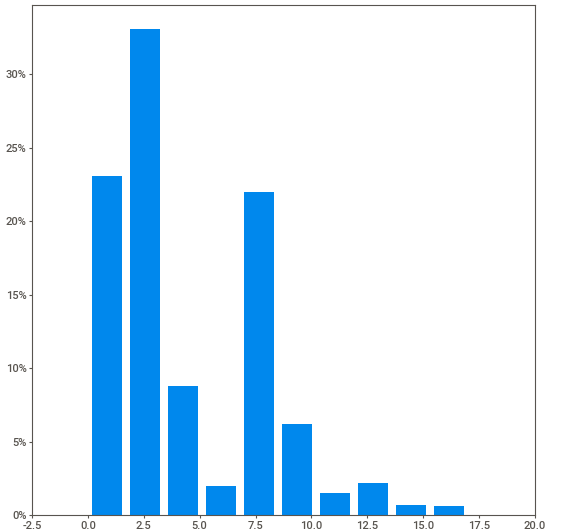
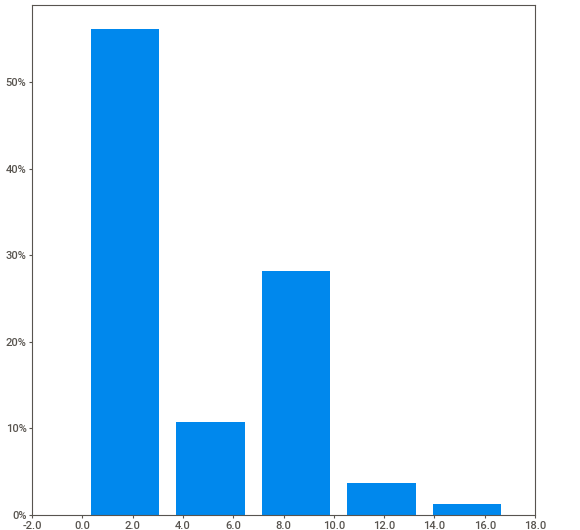
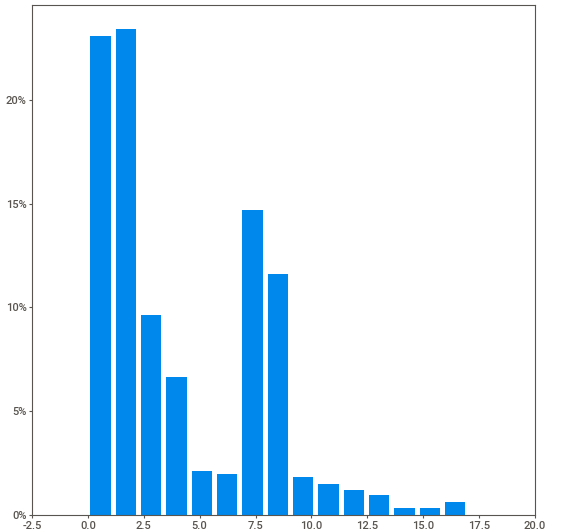
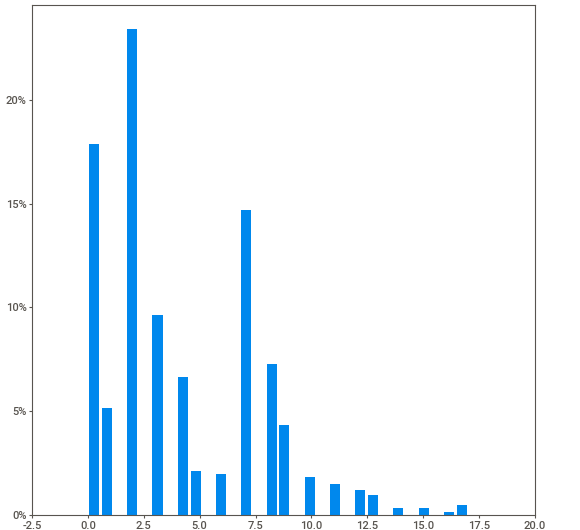
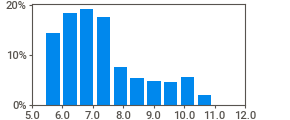
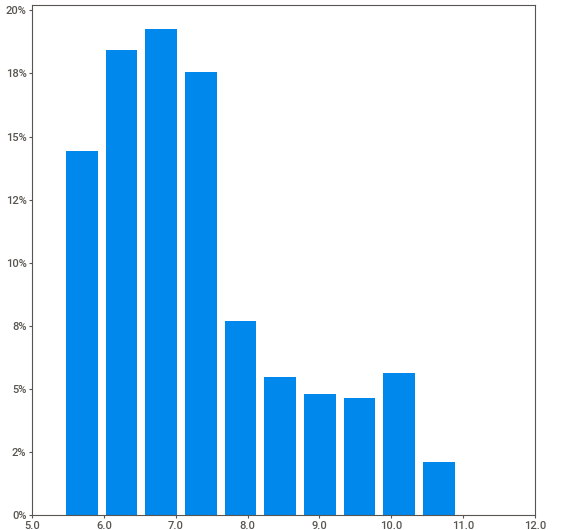
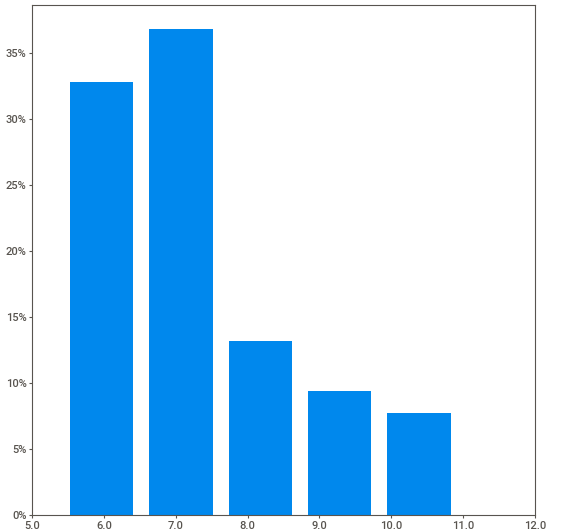
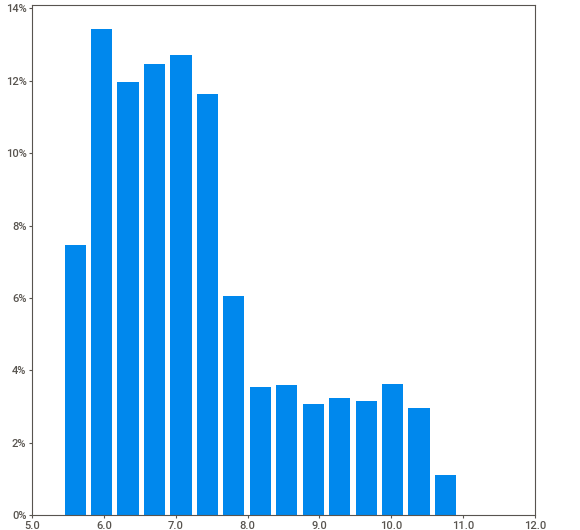
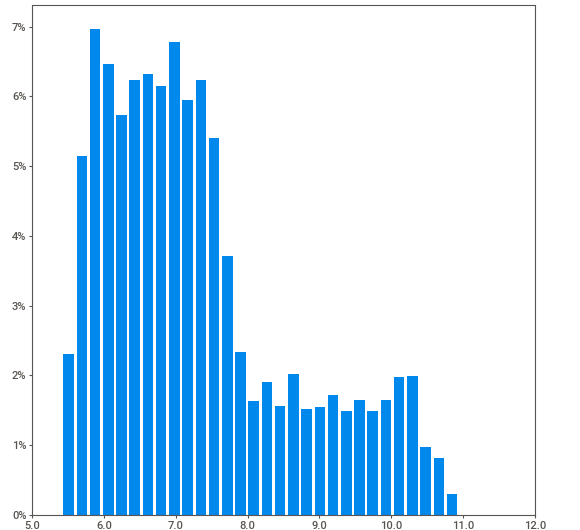
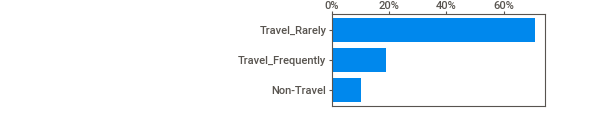
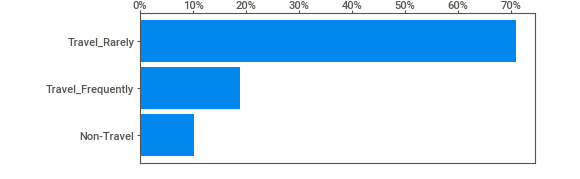
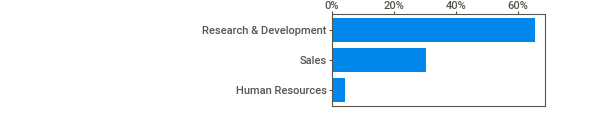
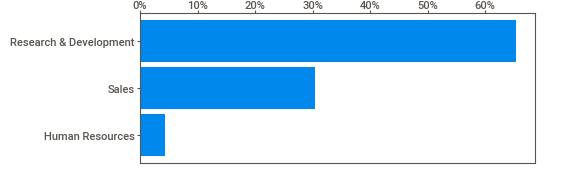
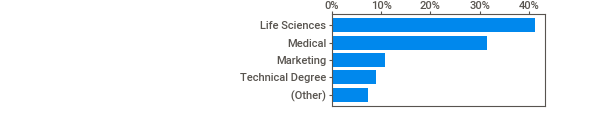
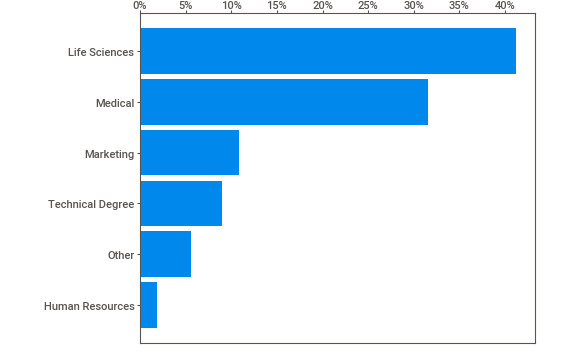
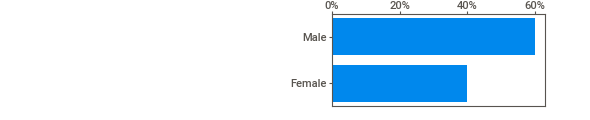
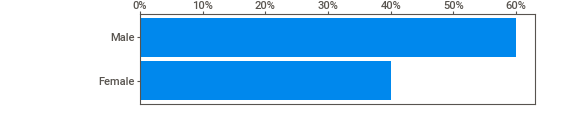
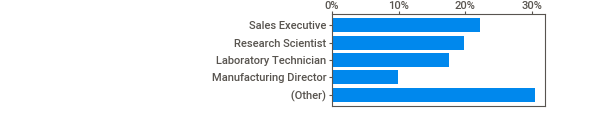
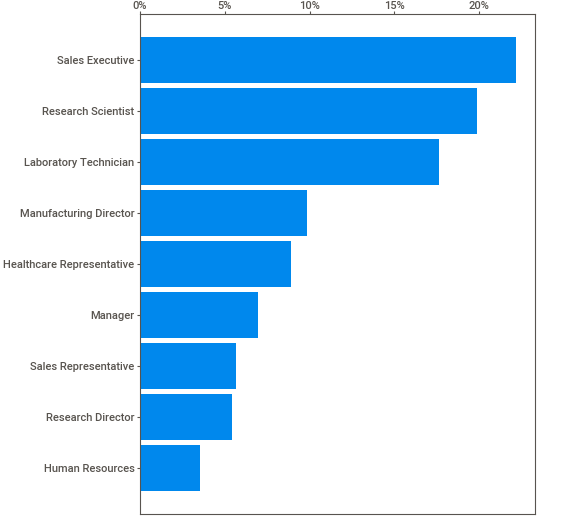
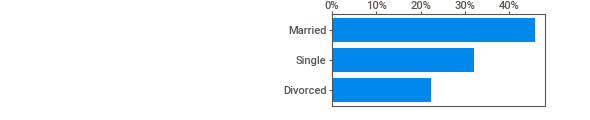
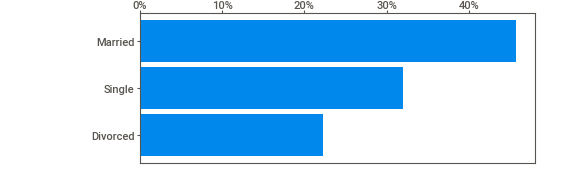
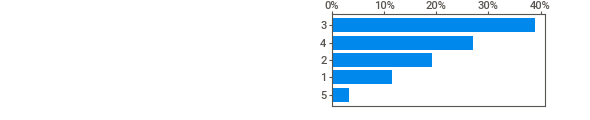
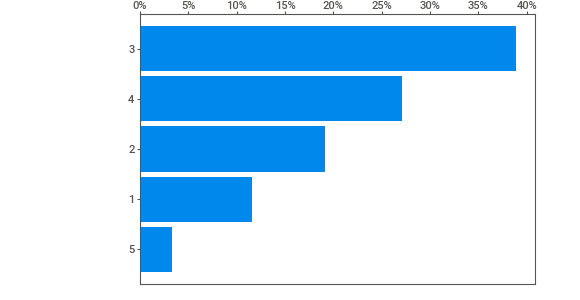
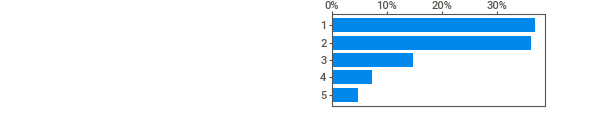
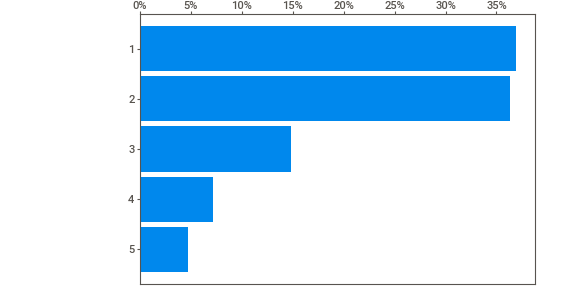
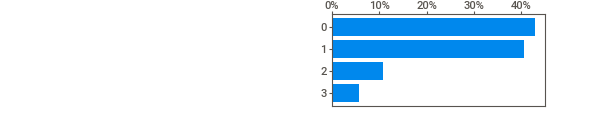
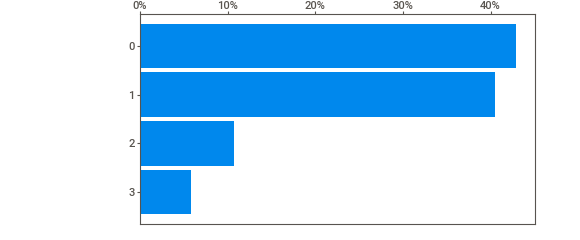
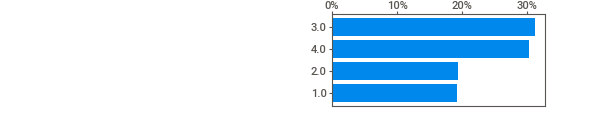
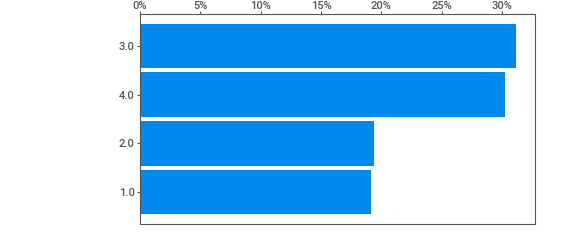
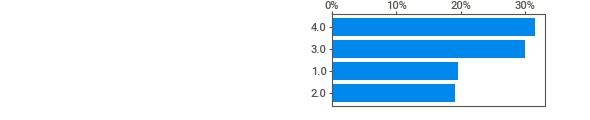
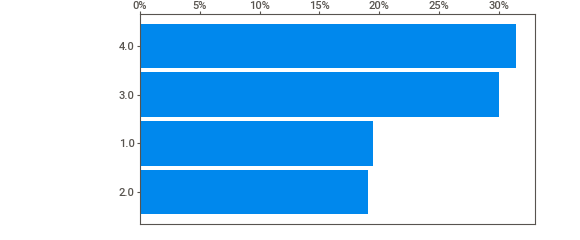
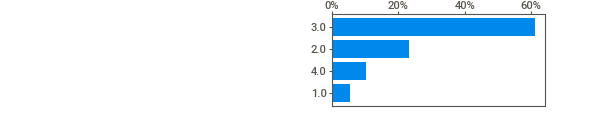
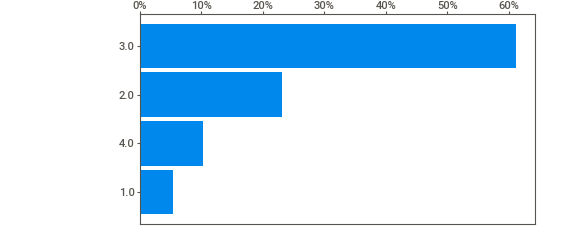
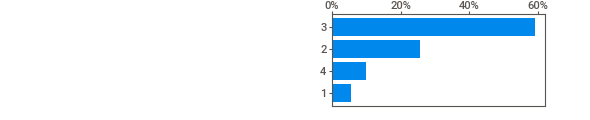
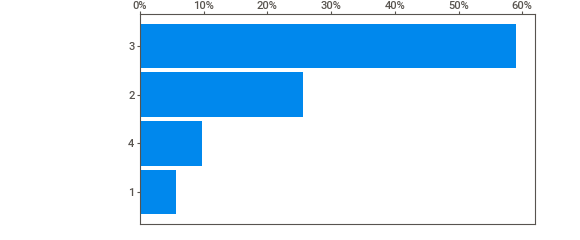
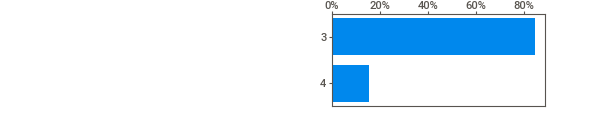
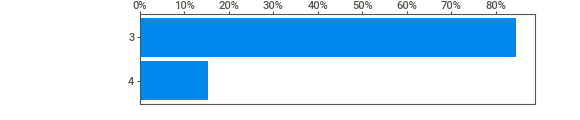
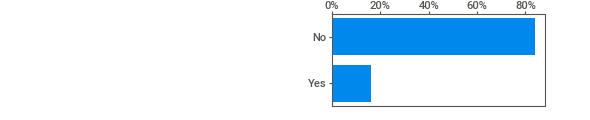
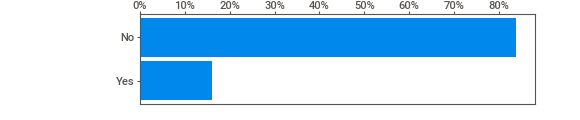
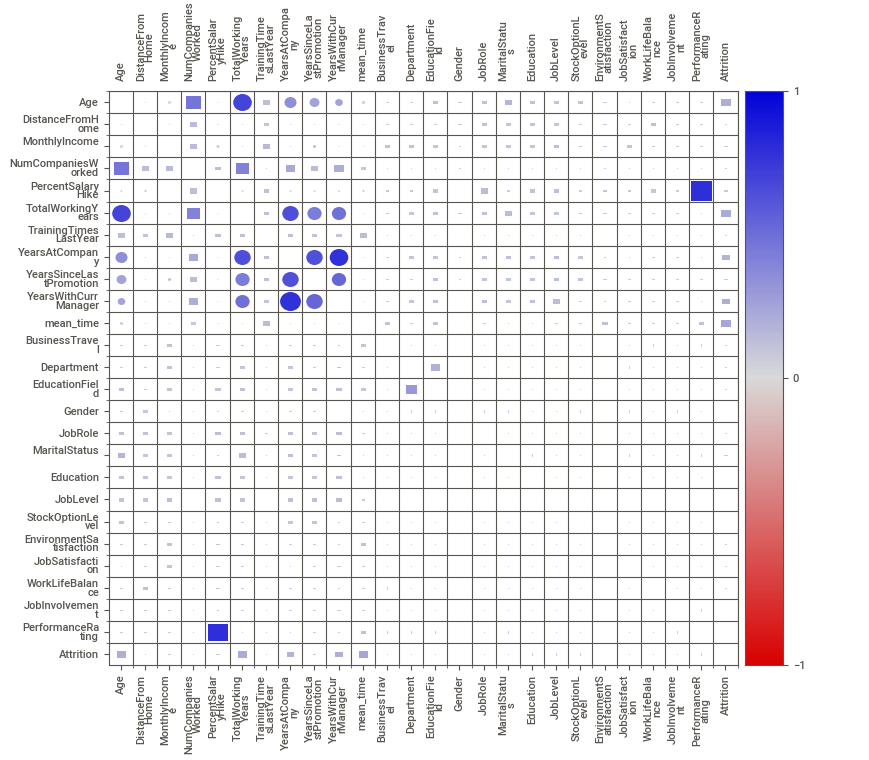
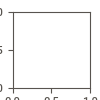

In [ ]:
#ahora haremos una exploración rapida de las variables
rgd = sv.analyze(df_datafinal)
rgd.show_notebook()

In [ ]:
#ahora estudiaremos mejor el comportamiento de las variables para observar la aproximación de nuestro analissi exploratorio
df_datafinal[['StockOptionLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']]= df_datafinal[['StockOptionLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']].astype(str)

In [ ]:
df_datafinal[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'mean_time']] = df_datafinal[['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'mean_time']].astype(float)

In [ ]:
df_datafinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   float64
 1   DistanceFromHome         4410 non-null   float64
 2   MonthlyIncome            4410 non-null   float64
 3   NumCompaniesWorked       4410 non-null   float64
 4   PercentSalaryHike        4410 non-null   float64
 5   TotalWorkingYears        4410 non-null   float64
 6   TrainingTimesLastYear    4410 non-null   float64
 7   YearsAtCompany           4410 non-null   float64
 8   YearsSinceLastPromotion  4410 non-null   float64
 9   YearsWithCurrManager     4410 non-null   float64
 10  mean_time                4410 non-null   float64
 11  BusinessTravel           4410 non-null   object 
 12  Department               4410 non-null   object 
 13  EducationField           4410 non-null   object 
 14  Gender                  

In [ ]:
df2_dummys = pd.get_dummies(df_datafinal.iloc[:,:-1])
df2_dummys.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,...,EnvironmentSatisfaction_3.0,EnvironmentSatisfaction_4.0,JobSatisfaction_1.0,JobSatisfaction_2.0,JobSatisfaction_3.0,JobSatisfaction_4.0,WorkLifeBalance_1.0,WorkLifeBalance_2.0,WorkLifeBalance_3.0,WorkLifeBalance_4.0
0,51.0,6.0,131160.0,1.0,11.0,1.0,6.0,1.0,0.0,0.0,...,True,False,False,False,False,True,False,True,False,False
1,31.0,10.0,41890.0,0.0,23.0,6.0,3.0,5.0,1.0,4.0,...,True,False,False,True,False,False,False,False,False,True
2,32.0,17.0,193280.0,1.0,15.0,5.0,2.0,5.0,0.0,3.0,...,False,False,False,True,False,False,True,False,False,False
3,38.0,2.0,83210.0,3.0,11.0,13.0,5.0,8.0,7.0,5.0,...,False,True,False,False,False,True,False,False,True,False
4,32.0,10.0,23420.0,4.0,12.0,9.0,2.0,6.0,0.0,4.0,...,False,True,True,False,False,False,False,False,True,False


In [ ]:
df2_dummys.columns

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'mean_time', 'Education', 'JobLevel', 'JobInvolvement',
       'PerformanceRating', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sal

## Metodos de regresión

Separaración de variales y caracteristicas


In [ ]:
X = df2_dummys
y = df_datafinal.iloc[:, -1].values # target

In [ ]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(y[0:5])


[0 1 0 0 0]


<Axes: xlabel='Attrition'>

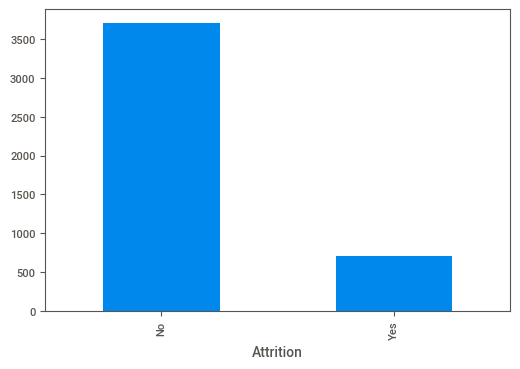

In [ ]:
df_datafinal['Attrition'].value_counts().plot(kind='bar')

Train/Test split

In [ ]:
# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento: (3528, 57)
Tamaño del conjunto de validación: (882, 57)


Regresión Logistica normal

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#Crea el modelo
regr = LogisticRegression()
#Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*100) + "%")

Coeficientes:  [[-0.28546931 -0.04854786 -0.06697556  0.35754372 -0.00738306 -0.6750533
  -0.23362595  0.1414234   0.54723185 -0.63227945  0.62949429 -0.10335745
  -0.09973496 -0.01517513 -0.03452469 -0.69881837  0.72738    -0.03072735
   0.57926263 -0.28480933 -0.29661902  0.47498647  0.10718487 -0.10236219
   0.01560168 -0.26139418 -0.23618236 -0.04053652  0.0383708   0.04647899
  -0.30267778  0.10588131 -0.27896036 -0.57448218  0.77748251  0.25153859
   0.33662382 -0.36405061 -0.47816175 -0.26381048  0.73980651  0.14448449
  -0.1908917   0.10979577 -0.06555428  0.70797991 -0.11660608 -0.09407222
  -0.49946733  0.77194923 -0.05632992 -0.02167985 -0.69610517  0.86675801
  -0.22093738 -0.45099508 -0.19699128]]

Intercepto:  [-1.1279046]
Accuracy (Train): 86.4795918367347%


In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

Accuracy (Test): 84.92063492063492%


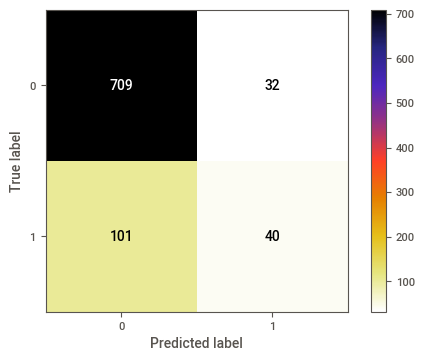

[[709  32]
 [101  40]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precicion: {TP/(TP+FP)}')
print(f'Recuperacion: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision*recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

Precicion: 0.8753086419753087
Recuperacion: 0.9568151147098516
F1-score: 2.0
Especificidad: 0.28368794326241137


Regresión Logistica Balanceada

In [ ]:
#vamos a relizar un modelo balanceado
from sklearn.linear_model import LogisticRegression

# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*100) + "%")
print("Score: ", regr.score(X_train_std, y_pred))

Coeficientes:  [[-0.28605928 -0.03000823 -0.10121166  0.34065852  0.0030668  -0.5677995
  -0.27642592  0.2587026   0.53105991 -0.70071969  0.62764971 -0.11039444
  -0.1151614   0.13224637  0.07221974 -0.79064127  0.73315284  0.02854367
   0.69707648 -0.4050307  -0.32099054  0.58615156  0.11681023 -0.1958565
   0.05295787 -0.33838103 -0.25062688 -0.03069929  0.00175453 -0.13191528
  -0.12335207  0.02820098 -0.2098194  -0.70837601  0.72772727  0.21789537
   0.36095583 -0.19026145 -0.55941869 -0.18213054  0.71260447  0.11106791
  -0.1689434   0.11890473 -0.089974    0.71243376 -0.18465178 -0.07317524
  -0.4835515   0.81954797 -0.11447029 -0.06071531 -0.67330713  0.86037871
  -0.24807313 -0.51016782 -0.13108252]]

Intercepto:  [-0.03482103]
Accuracy (Train): 76.53061224489795%
Score:  1.0


In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

Accuracy (Test): 73.46938775510205%


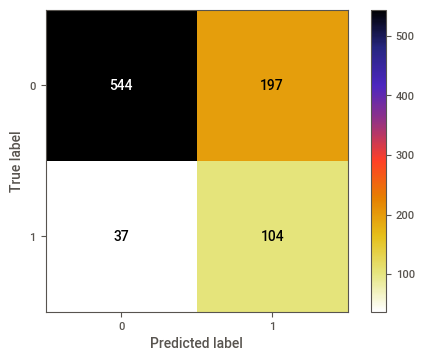

[[544 197]
 [ 37 104]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precicion: {TP/(TP+FP)}')
print(f'Recuperacion: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision*recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

Precicion: 0.9363166953528399
Recuperacion: 0.7341430499325237
F1-score: 2.0
Especificidad: 0.7375886524822695


##### OJO ### Anotar #cambios en la precision y la especificidad y bajo la recuperacion

Seleccionamos 10 variables

#RFE
#l objetivo de la eliminación recursiva de características (RFE) es seleccionar características considerando recursivamente conjuntos de características cada vez más pequeños.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.feature_selection import RFE

# Función recursiva de selección de características
def recursive_feature_selection(X,y,model,k):
  rfe = RFE(model, n_features_to_select=k, step=1)
  fit = rfe.fit(X, y)
  X_new = fit.support_
  print("Num Features: %s" % (fit.n_features_))
  print("Selected Features: %s" % (fit.support_))
  print("Feature Ranking: %s" % (fit.ranking_))

  return X_new

In [ ]:
# Establecer Estimador
model = LogisticRegression(max_iter=1000, solver = 'liblinear')
# Obtener columnas seleciconadas - (10 caracteristicas)
X_new = recursive_feature_selection(X, y, model, 10)
# Nuevo conjunto de datos
df_new = X.iloc[:,X_new]
df_new.head()


Num Features: 10
Selected Features: [False False False False False False False False False False False False
 False False False  True False  True False False False  True False False
 False False False False False False False False False False False False
 False False  True  True False False False False False False  True  True
  True False False False  True  True False False False]
Feature Ranking: [42 47 48 34 44 35 28 39 30 26 10 37 36 32 43  1 19  1 33  4  3  1 45 25
 29 20 11  9  8 27 17 40 18  2  5 38 31 22  1  1 13 46 21 41 24 16  1  1
  1 23  7  6  1  1 14 12 15]


,BusinessTravel_Non-Travel,BusinessTravel_Travel_Rarely,EducationField_Human Resources,MaritalStatus_Divorced,MaritalStatus_Married,EnvironmentSatisfaction_2.0,EnvironmentSatisfaction_3.0,EnvironmentSatisfaction_4.0,JobSatisfaction_4.0,WorkLifeBalance_1.0
0,False,True,False,False,True,False,True,False,True,False
1,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,True,True,False,False,False,True
3,True,False,False,False,True,False,False,True,True,False
4,False,True,False,False,False,False,False,True,False,False


In [ ]:
X = df_new
y = df_datafinal.iloc[:, -1].values # target

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

Tamaño del conjunto de entrenamiento: (3528, 10)
Tamaño del conjunto de validación: (882, 10)


In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train,y_train)*100) + "%")
print("Score: ", regr.score(X_train, y_pred))

Coeficientes:  [[-1.42046657 -0.59917264  1.41106723 -1.18506229 -0.95643757 -0.58319446
  -0.6293073  -0.8887181  -0.68565195  1.00728234]]

Intercepto:  [1.77763197]
Accuracy (Train): 68.42403628117914%
Score:  1.0


In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test,y_test)*100) + "%")

Accuracy (Test): 66.55328798185941%


Accuracy of the classifier is: 0.6655328798185941


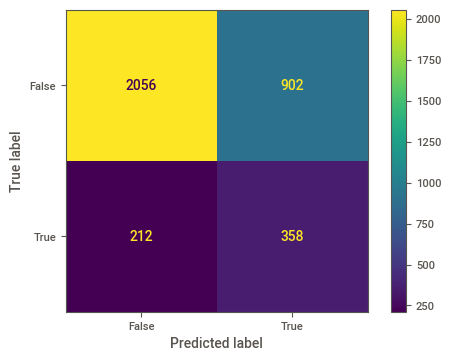

In [ ]:
#validar modelo
# Exactitud del modelo
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_hat)}")

# Matriz de confusion
cm1= confusion_matrix(y_train, y_pred)
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])
cm1_display.plot()
plt.show()

Accuracy of the classifier is: 0.6655328798185941


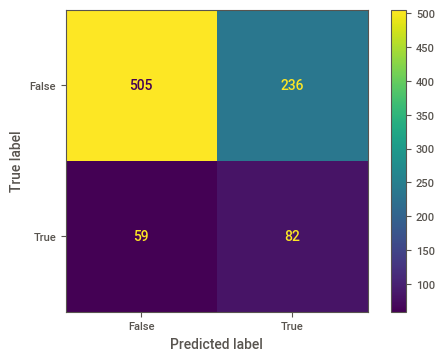

In [ ]:
#validar modelo
# Exactitud del modelo
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_hat)}")

# Matriz de confusion
cm1= confusion_matrix(y_test, y_hat)
# Visualización de la matriz de confusion
cm1_display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])
cm1_display.plot()
plt.show()

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precicion: {TP/(TP+FP)}')
print(f'Recuperacion: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision*recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

Precicion: 0.9363166953528399
Recuperacion: 0.7341430499325237
F1-score: 2.0
Especificidad: 0.7375886524822695


# Variance Threshold

##Variance Threshold
#Elimina todas las características cuya varianza no alcanza algún umbral.
#De forma predeterminada, elimina todas las características de varianza cero, es decir, las características que tienen el mismo valor en todas las muestras.

In [ ]:
X = df2_dummys

In [ ]:
#Variance Threshold
from sklearn.feature_selection import VarianceThreshold

#Función de filtro de caracteristicas
def variance_threshold(x,th):
    var_thres=VarianceThreshold(threshold=th)
    var_thres.fit(x)
    new_cols = var_thres.get_support()
    return new_cols

In [ ]:
# Obtener columnas seleccionadas
X_new = variance_threshold(X, 0.5)
# Nuevo dataframe
df_new = df2_dummys.iloc[:,X_new]
df_new.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,mean_time,Education,JobLevel,JobInvolvement
0,51.0,6.0,131160.0,1.0,11.0,1.0,6.0,1.0,0.0,0.0,6.8702,2,1,3
1,31.0,10.0,41890.0,0.0,23.0,6.0,3.0,5.0,1.0,4.0,7.3160,1,1,2
2,32.0,17.0,193280.0,1.0,15.0,5.0,2.0,5.0,0.0,3.0,6.8161,4,4,3
3,38.0,2.0,83210.0,3.0,11.0,13.0,5.0,8.0,7.0,5.0,6.7892,5,3,2
4,32.0,10.0,23420.0,4.0,12.0,9.0,2.0,6.0,0.0,4.0,7.8776,1,1,3


In [ ]:
X = df_new
y = df_datafinal.iloc[:, -1].values # target

# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento: (3528, 14)
Tamaño del conjunto de validación: (882, 14)


In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*100) + "%")
print("Score: ", regr.score(X_train_std, y_pred))

Coeficientes:  [[-0.2940019  -0.02002341 -0.12326051  0.29172571 -0.00082872 -0.45213297
  -0.23749786  0.12228385  0.37214221 -0.52179847  0.51035448 -0.04686758
  -0.08069301  0.0787578 ]]

Intercepto:  [-0.21977684]
Accuracy (Train): 66.43990929705215%
Score:  1.0


In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

Accuracy (Test): 63.49206349206349%


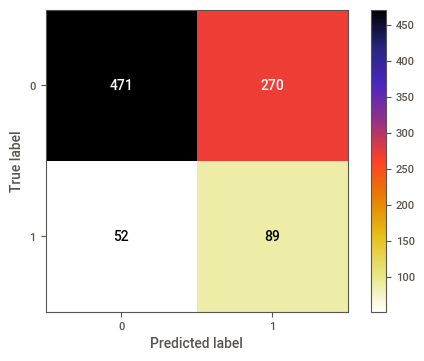

[[471 270]
 [ 52  89]]


In [ ]:
#validar modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precicion: {TP/(TP+FP)}')
print(f'Recuperacion: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision*recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

Precicion: 0.9005736137667304
Recuperacion: 0.6356275303643725
F1-score: 2.0
Especificidad: 0.6312056737588653


# K BEST

#Selección de características de acuerdo con las k puntuaciones más altas.
#Utiliza una función que toma dos matrices X e y, y devuelve un par de matrices (puntuaciones, valores de p) o una única matriz con puntuaciones.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Función de filtro de caracteristicas - stadis. scores
def select_kbest(X,y,score_f,k):
    sel_kb = SelectKBest(score_func=score_f, k=k)
    sel_kb.fit(X,y)
    new_cols = sel_kb.get_support()
    print("Scores:\n", sel_kb.scores_, "\nP-values:\n", sel_kb.pvalues_)
    return new_cols

In [ ]:
X= df2_dummys
y = df_datafinal.iloc[:,-1]

In [ ]:
# LabelEncoder
#from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#print(y[0:5])

In [ ]:
# Obtener columnas seleciconadas -
X_new = select_kbest(X, y, f_regression,10)
# Nuevo conjunto de datos
df_new = X.iloc[:,X_new]
df_new.head()

Scores:
 [1.14631682e+02 4.17369754e-01 4.28857038e+00 7.81308263e+00
 4.67023661e+00 1.31609555e+02 1.07968080e+01 8.10784452e+01
 4.81102093e+00 1.10236968e+02 1.81550273e+02 1.00678519e+00
 4.66760523e-01 1.07132817e+00 2.41560201e+00 2.45736984e+01
 5.92258389e+01 1.08438314e+01 2.89439474e+01 1.03299381e+00
 1.71860502e+00 3.72765138e+01 6.77229297e-01 6.29940950e-02
 2.56987898e-03 2.97218669e+00 7.29454073e+00 1.44858537e+00
 1.44858537e+00 8.35668863e-01 8.46517382e-01 6.12947520e-03
 1.39681097e+00 9.25371574e+00 1.09417542e+01 3.32634238e+00
 5.20766108e-01 5.40565982e-01 3.41788228e+01 3.67941159e+01
 1.39947949e+02 1.12150160e+00 2.32188828e+00 1.00397279e+00
 1.37263696e-01 6.47003726e+01 1.07346566e+00 7.36619627e+00
 1.03613930e+01 3.66496751e+01 7.18742527e-02 2.59324542e-01
 3.47736918e+01 4.39178055e+01 4.25050295e-01 1.84201185e+01
 1.10561831e+00] 
P-values:
 [1.99680162e-26 5.18286043e-01 3.84274849e-02 5.20937568e-03
 3.07433864e-02 4.84284055e-30 1.02470619e-03 3

,Age,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,mean_time,BusinessTravel_Travel_Frequently,EducationField_Human Resources,MaritalStatus_Single,EnvironmentSatisfaction_1.0,WorkLifeBalance_1.0
0,51.0,1.0,1.0,0.0,6.8702,False,False,False,False,False
1,31.0,6.0,5.0,4.0,7.3160,True,False,True,False,False
2,32.0,5.0,5.0,3.0,6.8161,True,False,False,False,True
3,38.0,13.0,8.0,5.0,6.7892,False,False,False,False,False
4,32.0,9.0,6.0,4.0,7.8776,False,False,True,False,False


In [ ]:
X = df_new
y = df_datafinal.iloc[:, -1].values # target

# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_test.shape)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num" , StandardScaler(), numeric_columns)], remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento: (3528, 10)
Tamaño del conjunto de validación: (882, 10)


In [ ]:
# Crea el modelo
regr = LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
# Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
# Imprime los coeficientes
print("Coeficientes: ", regr.coef_)

# Imprime el intercepto
print("\nIntercepto: ", regr.intercept_)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*100) + "%")
print("Score: ", regr.score(X_train_std, y_pred))

Coeficientes:  [[-0.20058997 -0.31882399  0.29978916 -0.5219105   0.53874421  0.69230499
   1.14821306  0.88771729  0.88116116  1.15799061]]

Intercepto:  [-1.05188577]
Accuracy (Train): 71.51360544217688%
Score:  1.0


In [ ]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

Accuracy (Test): 70.18140589569161%


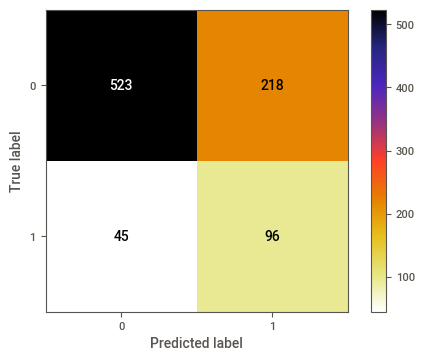

[[523 218]
 [ 45  96]]


In [ ]:
#VALIDAR MODELO
#validar modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='CMRmap_r')
plt.show()
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f'Precicion: {TP/(TP+FP)}')
print(f'Recuperacion: {TP/(TP+FN)}')
precision=TP/(TP+FP)
recall=TP/(TP+FN)
print(f'F1-score: {(2*precision*recall)/(precision*recall)}')
print(f'Especificidad: {TN/(FP+TN)}')

Precicion: 0.920774647887324
Recuperacion: 0.7058029689608637
F1-score: 2.0
Especificidad: 0.6808510638297872
